<a href="https://colab.research.google.com/github/roberwangunda/week_2_project_core/blob/master/Copy_of_Moringa_Data_Science_Core_W2_2020_08_Robert_Wang'unda_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Univariate Analysis:

#Research Question

In [1]:
# which individuals are more likely to use a bank account in the three countries?


The metrics for succcess

In [2]:
# use the the number of years to draw an analysis. 
# use the age of respondent to try and understand the question and design an answer based on the variablle under investigation

The context of the study

In [3]:
# the setting of the study is about individuals with the bank account in the three countries and not any other countries.

Experimental design

In [4]:
# Exploratory 
# Descriptive 
# Explanatory 

Relevence of the data

In [5]:
# Data provided is accurate, relevant and complete for the study

#Data Understanding

In [6]:
# reading our data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# loading our dataset
Financial_Dataset = 'Financial Dataset - 1.csv'

df_dataset = pd.read_csv(Financial_Dataset)

In [8]:
# determine the number of fields
df_dataset.shape

(23524, 13)

In [9]:

# previwing the columns
df_dataset.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [10]:
#renaming the names of the columns
#

df_dataset.rename(columns = {'Has a Bank account':'Has_a_Bank_account' , 'Type of Location': 'Type_of_Location',
       'Cell Phone Access':'Cell_Phone_Access', 'Respondent Age':'Respondent_Age',
       'The relathip with head':'The relathip_with_head',
       'Level of Educuation':'Level_of_Educuation', 'Type of Job':'Type_of_Job'}, inplace=True)

In [11]:
# preview the top data
df_dataset.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
# checking the types of datatypes
df_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has_a_Bank_account         object
Type_of_Location           object
Cell_Phone_Access          object
household_size            float64
Respondent_Age            float64
gender_of_respondent       object
The relathip_with_head     object
marital_status             object
Level_of_Educuation        object
Type_of_Job                object
dtype: object

#Data Preparation

In [13]:
# checking for outliers
# use interquartile range()
Q1 = df_dataset.quantile(0.25)
Q3 = df_dataset.quantile(0.75)
IQR = Q3 - Q1
(df_dataset < (Q1 - 1.5 * IQR)) |(df_dataset > (Q3 + 1.5 * IQR))

# there were outliers in the dataset
#yes or no implies the presence of outliers in the dataset.

,Cell_Phone_Access,Has_a_Bank_account,Level_of_Educuation,Respondent_Age,The relathip_with_head,Type_of_Job,Type_of_Location,country,gender_of_respondent,household_size,marital_status,uniqueid,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# correcting the ouliers
#

df_dataset_one = df_dataset[~((df_dataset < (Q1 - 1.5 * IQR)) |(df_dataset> (Q3 + 1.5 * IQR))).any(axis=1)]
df_dataset_one.head(3)


,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [15]:
# checking for missing values
df_dataset_one.isnull().sum()

# there were no missing values values

country                   14
year                       0
uniqueid                   0
Has_a_Bank_account        36
Type_of_Location          15
Cell_Phone_Access         11
household_size            27
Respondent_Age            33
gender_of_respondent      33
The relathip_with_head     4
marital_status            31
Level_of_Educuation       29
Type_of_Job               30
dtype: int64

In [16]:
# check for more information about your dataframe after cleaning
#
df_dataset_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22889 non-null  object 
 1   year                    22903 non-null  int64  
 2   uniqueid                22903 non-null  object 
 3   Has_a_Bank_account      22867 non-null  object 
 4   Type_of_Location        22888 non-null  object 
 5   Cell_Phone_Access       22892 non-null  object 
 6   household_size          22876 non-null  float64
 7   Respondent_Age          22870 non-null  float64
 8   gender_of_respondent    22870 non-null  object 
 9   The relathip_with_head  22899 non-null  object 
 10  marital_status          22872 non-null  object 
 11  Level_of_Educuation     22874 non-null  object 
 12  Type_of_Job             22873 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


#Exploratory Data Analysis and Visualization

In [17]:
# describing the various statistics from the data
# measures of central tendency and dispersion
#
df_dataset_one.describe()

,year,household_size,Respondent_Age
count,22903.000000,22876.000000,22870.000000
mean,2016.966642,3.573396,38.345081
std,0.844533,2.079783,15.804023
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


In [18]:

# calculating the skewness of the respondent age
#
df_dataset_one["Respondent_Age"].skew()

# respondent age is positively skewed to the right because of the positive value 0.7
# the mean for the household is greater than the mode and the median.

0.7409754960713362

In [19]:
# calculating the skewness of the household size
df_dataset_one["household_size"].skew()

# household size is positively skewed to the right because of the positive value 0.6
# the mean for the household is greater than the mode and the median.

0.6107328357162268

In [20]:
# calculating the skewness of the skewness of the year
df_dataset_one["year"].skew()

# year is positively skewed to the right because of the positive value 0.06
# the mean for the household is greater than the mode and the median.

0.06318146269461512

In [21]:
# calculating the kurtosis of the year
df_dataset_one["year"].kurt()

# the distribution of the of the years is statistically too flat indicating that there were no outliers
# the outliers were corrected during the cleaning process.
# the kurtosis is -1.5

-1.5951573822922471

In [22]:
# calculating the kurtosis of the household size
df_dataset_one["household_size"].kurt()

# the distribution for the household size is statistically too flat indicating that there were no outliers
# the outliers were corrected during the cleaning process.
# the kurtosis is -0.4

-0.49930440433763623

In [23]:
# calculate the kurtosis for the respondent age
df_dataset_one["Respondent_Age"].kurt()

# the distribution of the of the respondent age is too flat implying there were no outliers
# the outliers were corrected during the cleaning process.
# the kurtosis is -0.2

-0.23634544791914935

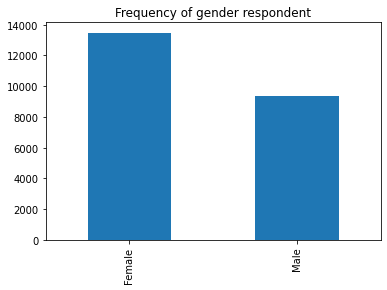

In [24]:
# plotting the histogram for the gender of respondent.
# the gender is classified in category of women and men hence not a numerical value.
# plot the distribution of the gender of the and determine the frequencies
#
df_dataset_one['gender_of_respondent'].value_counts().plot.bar(title="Frequency of gender respondent")

                 # OBSERVATIONS
# the number of women were more than the men

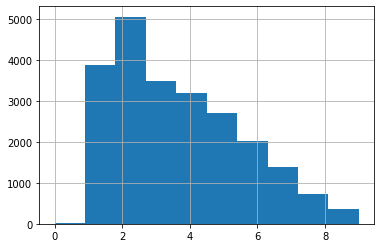

In [25]:
# Plotting the histogram for household size
# 
df_dataset_one['household_size'].hist()

              # observations
# the biggest household size was above 5000 
# the smallest household size was  below 1000

# BIVARIATE ANALYSIS:

In [26]:
# Calculating correlation
# 
df_dataset_one["household_size"].corr(df_dataset_one["year"]) 

# the variables have weak negative correlation


-0.0974006720109618

In [27]:
# calculate the pearson of coefficient 
# between the year respondent age and household size

df_dataset_one["household_size"].corr(df_dataset_one["Respondent_Age"]) 

# the variables have weak negative correlation

-0.10623942590329913

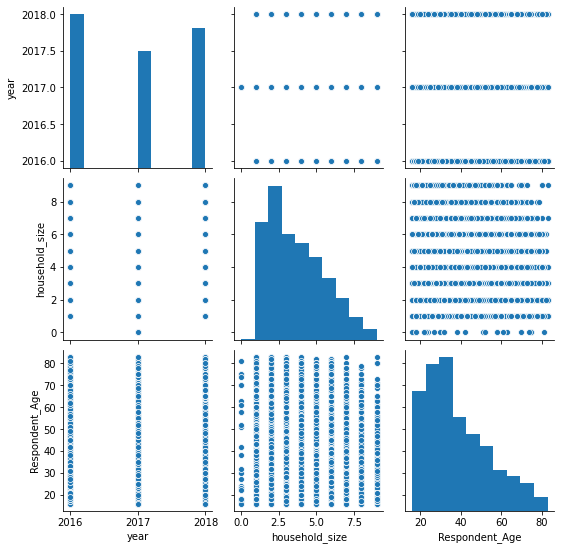

In [28]:
# plotting summaries and my observations 

sns.pairplot(df_dataset_one)
plt.show()

               #observations
# from the visualizations below there were no positive or negative relationships among the variables.
# the histograms are tailed to the left.



#Multivariate Analysis

In [29]:
# checking the information about the dataframe
#

df_dataset_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22889 non-null  object 
 1   year                    22903 non-null  int64  
 2   uniqueid                22903 non-null  object 
 3   Has_a_Bank_account      22867 non-null  object 
 4   Type_of_Location        22888 non-null  object 
 5   Cell_Phone_Access       22892 non-null  object 
 6   household_size          22876 non-null  float64
 7   Respondent_Age          22870 non-null  float64
 8   gender_of_respondent    22870 non-null  object 
 9   The relathip_with_head  22899 non-null  object 
 10  marital_status          22872 non-null  object 
 11  Level_of_Educuation     22874 non-null  object 
 12  Type_of_Job             22873 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.1+ MB


In [30]:
# preparing the data for the discriminat analysis
# clean the data first by dropping the columns with object datatypes

df_dataset_one.drop(['country','Type_of_Location', 'Cell_Phone_Access', 'gender_of_respondent',
                     'The relathip_with_head', 'marital_status', 'Level_of_Educuation', 'Type_of_Job'
                     ], axis= 1, inplace= True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
# drop the uniqueid because it is an object datatype
df_dataset_one.drop(['uniqueid'], axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# drop the uniqueid because it is an object datatype
df_dataset_one.drop(['uniqueid'], axis = 1, inplace= True)

In [40]:
# print out the data to ascertain if you only have numerical integers
#

print(df_dataset_one)

       year Has_a_Bank_account  household_size  Respondent_Age
0      2018                Yes             3.0            24.0
1      2018                 No             5.0            70.0
2      2018                Yes             5.0            26.0
3      2018                 No             5.0            34.0
4      2018                 No             8.0            26.0
...     ...                ...             ...             ...
23512  2018                 No             2.0            57.0
23519  2018                 No             4.0            48.0
23520  2018                 No             2.0            27.0
23521  2018                 No             5.0            27.0
23522  2018                 No             7.0            30.0

[22816 rows x 4 columns]


In [33]:
# check for missing values 
# 

df_dataset_one.isnull().sum()

year                   0
Has_a_Bank_account    36
household_size        27
Respondent_Age        33
dtype: int64

In [34]:
# drop those missing values
#

df_dataset_one.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
# confirm if the data is okay and lacks missing values
#
df_dataset_one.isnull().sum()

year                  0
Has_a_Bank_account    0
household_size        0
Respondent_Age        0
dtype: int64

# Implementing the solution by carring out a principal component analysis.

In [43]:
# divide the data into feature set and corresponding values
#
X = df_dataset_one.drop('Has_a_Bank_account', 1)
y = df_dataset_one['Has_a_Bank_account']

In [44]:
#Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# perform pca with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 

# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# perform pca on the dataset
#
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [48]:
# calculate the Explained Variance Ratio
# 
explained_variance = pca.explained_variance_ratio_

# add the two variances collectively
# the total is 99%
# in the feature set is captured by the first two principal components.
explained_variance

array([0.37854351, 0.33995155, 0.28150494])

In [50]:
# use the 1 and 2 Principal Component
# 
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [51]:
# Train and Make Predictions
# Import random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [52]:
# Step 8: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[3909    0]
 [ 655    0]]
Accuracy0.8564855390008764


#Implementing the Solution

In [53]:
# the accuracy of the model is 86% when using Has_a_Bank_account in determining the individuals with the bank accounts

Challenging the solution

In [54]:
# the model is not accurate since the accuracy level is ony 86%
# the principal component analysis uses only numerical values
# categorical values could have given us the accurate figures

follow up questions

In [ ]:
# we had the right question.